In [1]:
from __future__ import print_function
from argparse import ArgumentParser
from collections import OrderedDict
from scipy.stats import gaussian_kde, rankdata

import numpy as np
import nibabel as nb
import networkx as nx
import pickle
import sys
import os

def loadGraphs(filenames, atlas = None, verb=False):
    """
    Given a list of files, returns a dictionary of graphs
    Required parameters:
        filenames:
            - List of filenames for graphs
    Optional parameters:
        atlas:
            - Name of atlas of interest as it appears in the directory titles
        verb:
            - Toggles verbose output statements
    """
    #  Initializes empty dictionary
    if type(filenames) is not list:
        filenames = [filenames]
    gstruct = OrderedDict()
    for idx, files in enumerate(filenames):
        if verb:
            print("Loading: " + files)
        #  Adds graphs to dictionary with key being filename
        fname = os.path.basename(files)
        try:
            gstruct[fname] = nx.read_weighted_edgelist(files)
        except:
            gstruct[fname] = nx.read_gpickle(files)
    return gstruct

In [2]:
%load_ext autoreload
%autoreload 2

In [119]:
import os, sys
sys.path.append('../../..')
import lemur.utils.qa_graphs as qag
import lemur.utils.qa_graphs_plotting as qap
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)

In [31]:
fs = [
    '../../../data/gr_real_bids/sub-NDARAV945MCQ/func/sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'
]
DERIV_OUT = '../../../data/gr_dev_test'

OrderedDict([('sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', <networkx.classes.graph.Graph object at 0x7f6cad09b8d0>)])



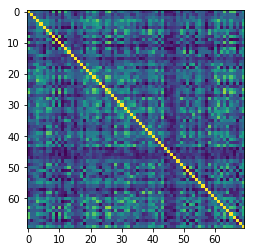

In [5]:
gstruct = qag.loadGraphs(fs)
print(gstruct)
g = list(gstruct.values())[0]
print(g)
plt.imshow(nx.to_numpy_matrix(g))

In [71]:
statsDict = qag.compute_metrics(fs, modality='func', thresh=0.1)

Computing: NNZ
Sample Mean: 2221.00
Computing: Max Local Statistic Sequence
Subject Means: 1845.36
Computing: Clustering Coefficient Sequence
Subject Means: 0.44
Computing: Degree Sequence
OrderedDict([('sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', [106406.0, 93059.0, 87798.0, 122207.0, 90708.0, 110606.0, 92829.0, 54473.0, 92482.0, 33915.0, 81292.0, 42239.0, 85162.0, 95626.0, 99897.0, 73637.0, 120596.0, 123548.0, 121051.0, 108818.0, 73827.0, 71969.0, 112071.0, 110169.0, 57453.0, 107233.0, 96410.0, 97506.0, 115899.0, 124338.0, 78608.0, 96023.0, 84262.0, 85370.0, 78884.0, 40068.0, 61232.0, 117798.0, 72666.0, 89772.0, 80001.0, 122299.0, 72794.0, 54411.0, 38289.0, 104611.0, 88309.0, 87436.0, 98951.0, 76965.0, 92436.0, 75382.0, 75594.0, 123086.0, 80245.0, 40537.0, 86993.0, 64295.0, 122823.0, 108122.0, 94794.0, 112584.0, 67342.0, 93935.0, 107951.0, 86336.0, 65434.0, 79782.0, 41492.0, 126574.0])])
Subject Means: 88253.00
Computing: Edge Weight Sequence
Subj

In [79]:
qap.make_panel_plot(statsDict, DERIV_OUT)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]
[ (2,1) x5,y5 ]  [ (2,2) x6,y6 ]  [ (2,3) x7,y7 ]  [ (2,4) x8,y8 ]



In [42]:
print(statsDict.keys())

dict_keys(['study_mean_connectome', 'number_non_zeros', 'clustering_coefficients', 'locality_statistic', 'betweenness_centrality', 'degree_distribution', 'path_length', 'eigen_sequence'])


In [7]:
d = nx.degree(g)
print(np.max(list(d.values())))

AttributeError: 'DegreeView' object has no attribute 'values'

In [8]:
nx.__version__

'2.1'

In [14]:
g.degree(weight=True)

DegreeView({'21': 71, '36': 71, '10': 71, '11': 71, '49': 71, '14': 71, '4': 71, '13': 71, '20': 71, '7': 71, '32': 71, '34': 71, '46': 71, '25': 71, '66': 71, '15': 71, '31': 71, '51': 71, '16': 71, '44': 71, '50': 71, '68': 71, '9': 71, '28': 71, '3': 71, '54': 71, '41': 71, '48': 71, '55': 71, '22': 71, '65': 71, '56': 71, '39': 71, '67': 71, '45': 71, '47': 71, '35': 71, '8': 71, '69': 71, '2': 71, '43': 71, '63': 71, '59': 71, '52': 71, '40': 71, '1': 71, '38': 71, '6': 71, '23': 71, '33': 71, '58': 71, '57': 71, '27': 71, '24': 71, '70': 71, '12': 71, '37': 71, '5': 71, '64': 71, '60': 71, '61': 71, '30': 71, '17': 71, '18': 71, '29': 71, '19': 71, '62': 71, '53': 71, '42': 71, '26': 71})

In [15]:
g.__dict__

{'_adj': {'1': {'1': {'weight': 1.0},
   '10': {'weight': 0.4806860637},
   '11': {'weight': 0.448475571657},
   '12': {'weight': 0.290457145788},
   '13': {'weight': 0.314404921886},
   '14': {'weight': 0.341707293733},
   '15': {'weight': 0.246275060868},
   '16': {'weight': 0.46942735564},
   '17': {'weight': 0.371000612719},
   '18': {'weight': 0.422327728766},
   '19': {'weight': 0.345860303613},
   '2': {'weight': 0.254787242877},
   '20': {'weight': 0.229028397531},
   '21': {'weight': 0.33533982123},
   '22': {'weight': 0.36912090039},
   '23': {'weight': 0.419624582338},
   '24': {'weight': 0.27531584327},
   '25': {'weight': 0.375990024469},
   '26': {'weight': 0.480777506726},
   '27': {'weight': 0.3130154782},
   '28': {'weight': 0.336754974168},
   '29': {'weight': 0.409088592144},
   '3': {'weight': 0.273838210834},
   '30': {'weight': 0.388529379891},
   '31': {'weight': 0.468800381862},
   '32': {'weight': 0.255621176543},
   '33': {'weight': 0.297425605541},
   '34': {

In [127]:
from lemur import plotters

In [86]:
import os
os.getcwd()

'/home/nitin/hopkins/fall2017/ndd/lemur/docs/notebooks/nkumar14'

In [98]:
# Let's assume we are in the data folder
fs = '../../../data/gr_real_bids'
DERIV_OUT = '../../../data/gr_dev_test'

In [102]:
# Get subdirectories that contains edgelist files
edgefolder = [x[0] for x in os.walk(fs) if ('func' in x[0] and 'sub' in x[0])]
edgefolder

['../../../data/gr_real_bids/sub-NDAREM018TJQ/func',
 '../../../data/gr_real_bids/sub-NDARHP176DPE/func',
 '../../../data/gr_real_bids/sub-NDARAT299YRR/func',
 '../../../data/gr_real_bids/sub-NDARAA536PTU/func',
 '../../../data/gr_real_bids/sub-NDARAV945MCQ/func',
 '../../../data/gr_real_bids/sub-NDAREL063PMX/func',
 '../../../data/gr_real_bids/sub-NDARAJ366ZFA/func',
 '../../../data/gr_real_bids/sub-NDARAR025WX4/func']

In [107]:
edgepickle = [os.listdir(x) for x in edgefolder]
edgepickle

[['sub-NDAREM018TJQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDARHP176DPE_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDARAT299YRR_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDARAA536PTU_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDAREL063PMX_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist'],
 ['sub-NDARAJ366ZFA_task-rest_bold_DS00583_res-2x2x2_measure-correlation.gpickle',
  'sub-NDARAJ366ZFA_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
  'sub-NDARAJ366ZFA_task-rest_bold_DS00071_res-2x2x2_measure-correlation.gpickle',
  'sub-NDARAJ366ZFA_task-rest_bold_DK_res-2x2x2_measure-correlation.gpickle',
  'sub-NDARAJ366ZFA_task-rest_bold_DS00096_res-2x2x2_measure-correlation.gpickle',
  'sub-NDARAJ366ZFA_task-rest_bold_DS00140_res-2x2x2_measure-correlation.gpickl

In [111]:
edgelist = []
for filelist in edgepickle:
    for i in range(len(filelist)):
        if "edgelist" in filelist[i]:
            edgelist.append(filelist[i])
print(edgelist)
print(len(edgelist))

['sub-NDAREM018TJQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARHP176DPE_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARAT299YRR_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARAA536PTU_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDAREL063PMX_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARAJ366ZFA_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', 'sub-NDARAR025WX4_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist']
8


In [113]:
mylist = ["/".join([edgefolder[i],edgelist[i]]) for i in range(len(edgelist))]
mylist

['../../../data/gr_real_bids/sub-NDAREM018TJQ/func/sub-NDAREM018TJQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARHP176DPE/func/sub-NDARHP176DPE_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARAT299YRR/func/sub-NDARAT299YRR_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARAA536PTU/func/sub-NDARAA536PTU_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARAV945MCQ/func/sub-NDARAV945MCQ_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDAREL063PMX/func/sub-NDAREL063PMX_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARAJ366ZFA/func/sub-NDARAJ366ZFA_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist',
 '../../../data/gr_real_bids/sub-NDARAR025WX4/func/sub-NDARAR025WX4_task-res

In [128]:
gp = plotters.GraphPlotter(mylist,DERIV_OUT)

In [129]:
gp.makeplot(modality = 'func')

Computing: NNZ
Sample Mean: 2086.50
Computing: Max Local Statistic Sequence
Subject Means: 2111.44, 778.51, 2378.57, 1437.59, 1683.19, 1845.36, 1153.81, 1680.00
Computing: Clustering Coefficient Sequence
Subject Means: 0.44, 0.43, 0.45, 0.44, 0.43, 0.44, 0.43, 0.43
Computing: Degree Sequence
OrderedDict([('sub-NDARAJ366ZFA_task-rest_bold_desikan_res-2x2x2_measure-correlation.edgelist', [104548.0, 125631.0, 94406.0, 68074.0, 60805.0, 103180.0, 98543.0, 50982.0, 62095.0, 74281.0, 117701.0, 49879.0, 92572.0, 109557.0, 104321.0, 72943.0, 107827.0, 121270.0, 129016.0, 104073.0, 61643.0, 48567.0, 101615.0, 91595.0, 75726.0, 59273.0, 86393.0, 61687.0, 116479.0, 95920.0, 79186.0, 98922.0, 106565.0, 106443.0, 73233.0, 75181.0, 88484.0, 103949.0, 91559.0, 91352.0, 46130.0, 105284.0, 89301.0, 92370.0, 38733.0, 118672.0, 80739.0, 49869.0, 108344.0, 59496.0, 96054.0, 91411.0, 64942.0, 108841.0, 75625.0, 100267.0, 33757.0, 84695.0, 98515.0, 118792.0, 109107.0, 105873.0, 79193.0, 89525.0, 120910.0, 1